Compare Condensability score and C-half

In [1]:
# python modules
import sys
import copy
import re
import random
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

In [5]:
### load gtab files
gtab_path = "/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/"
dinfo_dkey = {'mCD8T:WT_NCP_sp_1rep_10kb_score_table.gtab.gz':
              {'mCD8T:WT_NCP_sp_8_1rep':(1, 'mCD8T:WT', 'score')},
              'mCD8T:WT_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz':
              {'C-half':(1, 'mCD8T:WT', 'C-half')},
              'mCD8T:DFMO_NCP_sp_1rep_10kb_score_table.gtab.gz':
              {'mCD8T:DFMO_NCP_sp_8_1rep':(1, 'mCD8T:DFMO', 'score')},
              'mCD8T:DFMO_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz':
              {'C-half':(1, 'mCD8T:DFMO', 'C-half')},
              'mCD8T:ODCKO_NCP_sp_1rep_10kb_score_table.gtab.gz':
              {'mCD8T:ODCKO_NCP_sp_8_1rep':(1, 'mCD8T:ODCKO', 'score')},
              'mCD8T:ODCKO_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz':
              {'C-half':(1, 'mCD8T:ODCKO', 'C-half')}
              }

dkey_ID_score = load_file.read_gtab_batch (dinfo_dkey,
                                           data_path=gtab_path,
                                           skip_nan=True)


loading mCD8T:DFMO_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz


loading mCD8T:ODCKO_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz


loading mCD8T:ODCKO_NCP_sp_1rep_10kb_score_table.gtab.gz


loading mCD8T:WT_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz


loading mCD8T:WT_NCP_sp_1rep_10kb_score_table.gtab.gz


loading mCD8T:DFMO_NCP_sp_1rep_10kb_score_table.gtab.gz


Done


mCD8T:WT
Spearman: -0.56
Pearson: -0.60


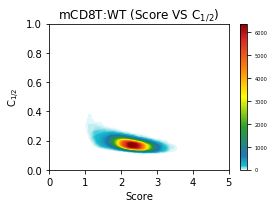

mCD8T:DFMO
Spearman: -0.69
Pearson: -0.73


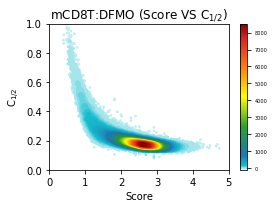

mCD8T:ODCKO
Spearman: -0.71
Pearson: -0.72


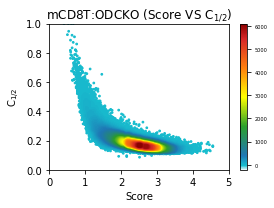

In [6]:
### compare Condensability Score vs C-half
cells = ['mCD8T:WT', 'mCD8T:DFMO', 'mCD8T:ODCKO']
for cell in cells:    
    dkey1 = (1, cell, 'score')
    dkey2 = (1, cell, 'C-half')
    ID_score1 = dkey_ID_score[dkey1]
    ID_score2 = dkey_ID_score[dkey2]
    IDs = list(set(ID_score1.keys()) & set(ID_score2.keys()))
    X = [ID_score1[ID] for ID in IDs]
    Y = [ID_score2[ID] for ID in IDs]

    spearman_corr = scipy.stats.spearmanr(X, Y)[0]
    pearson_corr = scipy.stats.pearsonr(X, Y)[0]
    print cell
    print "Spearman: %1.2f" % (spearman_corr)
    print "Pearson: %1.2f" % (pearson_corr)

    graphics.density_scatter(X,
                             Y,
                             xlim=[0, 5],
                             ylim=[0, 1],
                             bins=50,
                             xlabel='Score',
                             ylabel='C$_{1/2}$',
                             title='%s (Score VS C$_{1/2}$)' % (cell),
                             save_path='./data/',
                             save=True,
                             note=cell)
    

mCD8T:ODCKO
Spearman: -0.62
Pearson: -0.66


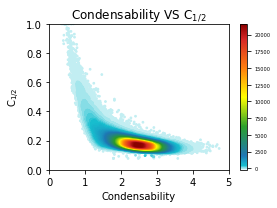

In [7]:
### compare Condensability Score vs C-half (combined all)
cells = ['mCD8T:WT', 'mCD8T:DFMO', 'mCD8T:ODCKO']
X, Y = [], []
for cell in cells:    
    dkey1 = (1, cell, 'score')
    dkey2 = (1, cell, 'C-half')
    ID_score1 = dkey_ID_score[dkey1]
    ID_score2 = dkey_ID_score[dkey2]
    IDs = list(set(ID_score1.keys()) & set(ID_score2.keys()))
    X += [ID_score1[ID] for ID in IDs]
    Y += [ID_score2[ID] for ID in IDs]

spearman_corr = scipy.stats.spearmanr(X, Y)[0]
pearson_corr = scipy.stats.pearsonr(X, Y)[0]
print cell
print "Spearman: %1.2f" % (spearman_corr)
print "Pearson: %1.2f" % (pearson_corr)

graphics.density_scatter(X,
                         Y,
                         xlim=[0, 5],
                         ylim=[0, 1],
                         bins=50,
                         xlabel='Condensability',
                         ylabel='C$_{1/2}$',
                         title='Condensability VS C$_{1/2}$',
                         save_path='./data/',
                         save=True,
                         note='_combined')